# Wrangle: [testfit.io](https://blog.testfit.io/)

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

## Stakeholder Notes
- Work with Commitments
- Activity Descriptions == New Construction, SubRehab, Additions, and Improvements
- Loan amount >= $1M:
    - Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance?
    - Mortgage at Firm Commitment Issuance?
    - Final Mortgage Amount? **Probably this one...**
- Market == Large urban centers; meaning **cities** not just states; not rural one-off projects
- Types of FHA loan is irrelevant

In [3]:
# commitments
df  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
print(df.shape)
df.head()

(20918, 29)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [4]:
df.rename(columns={"Activity Group": "activity_group"}, inplace=True)

In [5]:
# activity_groups
df = df[(df.activity_group == "NC/SR") | (df.activity_group == "Imp/Adds")]

In [6]:
df = df[df["Final Mortgage Amount"] >= 1000000]
df.head()

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,activity_group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
5,11732003,Sieber Apartments,Oklahoma City,OK,Basic FHA,FHA NC/SR Apts,SubRehab,NC/SR,Apts,220,Firm Issued,HARRY MORTGAGE CO,3979700,38,2005-10-04,2006,3979700,2005-10-04,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,4194200
9,5235624,Port Capital Village,Elkridge,MD,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AGM FINANCIAL SERVICES,5410000,84,2005-10-06,2006,5410000,2005-10-06,2006,MAP,0,Y,Y,0,0,0,0,Finally Endorsed,5410000
29,6135628,Veranda at the Villages at Carver,Atlanta,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,AMERICAN PROPERTY FINCG,3988000,90,2005-10-14,2006,3988000,2005-10-14,2006,MAP,Y,0,0,0,0,0,0,Finally Endorsed,3988000
41,9235668,St. Anthony Mills Apartments,Minneapolis,MN,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,GLASER FINANCIAL GRP,6140000,93,2005-10-17,2006,6140000,2005-10-17,2006,TAP,Y,Y,Y,0,0,0,0,Finally Endorsed,6120000
50,6135631,Peabody Apartments,Columbus,GA,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,Firm Issued,"CAPMARK FINANCE, INC",3335000,184,2005-10-19,2006,3335000,2005-10-19,2006,MAP,Y,0,0,0,0,0,Y,Finally Endorsed,3335000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3856 entries, 5 to 20909
Data columns (total 29 columns):
FHA Number                                                               3856 non-null int64
Project Name                                                             3856 non-null object
Project City                                                             3856 non-null object
Project State                                                            3856 non-null object
Basic FHA, Risk Share or Other                                           3856 non-null object
Program Category                                                         3856 non-null object
Activity Description                                                     3856 non-null object
activity_group                                                           3856 non-null object
Facility Type                                                            3856 non-null object
Program Designation                            

In [8]:
df["Activity Description"].value_counts()

New Construction    2418
SubRehab            1392
Refinance             24
Purchase              20
Improvements           1
Additions              1
Name: Activity Description, dtype: int64

In [9]:
df["activity_group"].value_counts()

NC/SR    3856
Name: activity_group, dtype: int64

In [10]:
df.rename(columns={"Facility Type": "facility_type"}, inplace=True)

In [11]:
df.facility_type.value_counts()

Apts                            2669
Coop/Apts/Mobile Home Pk/ALF     732
Asst'd Livg                      211
Nursing/ICF                      106
Coop                              71
Hospital                          47
Apts/Coops                        10
Mobile Home Pk                     5
SRO                                3
Board & Care                       2
Name: facility_type, dtype: int64

In [12]:
df.rename(columns={"FHA Number": "fha_number"}, inplace=True)

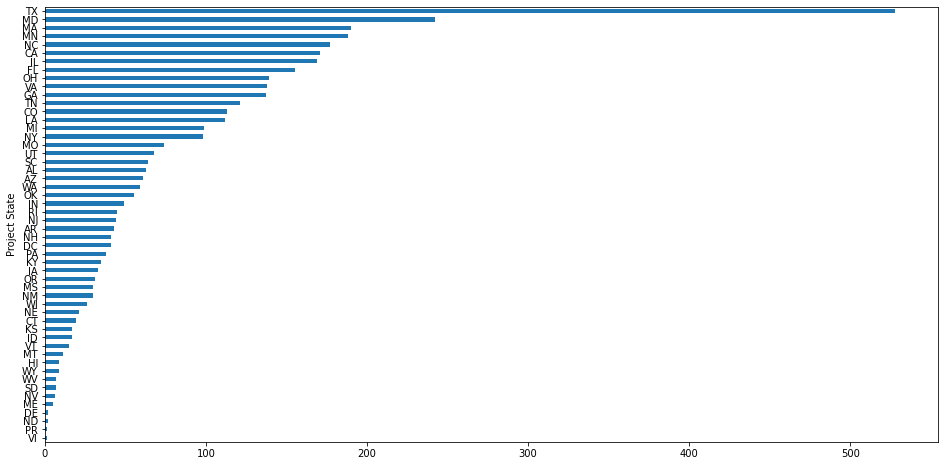

In [13]:
df.groupby(["Project State"]).fha_number.count().sort_values().plot.barh()
plt.show()

In [14]:
df[df["Final Mortgage Amount"] >= 1000000].shape

(3856, 29)

In [15]:
df.rename(columns={"Final Mortgage Amount": "final_mortgage"}, inplace=True)

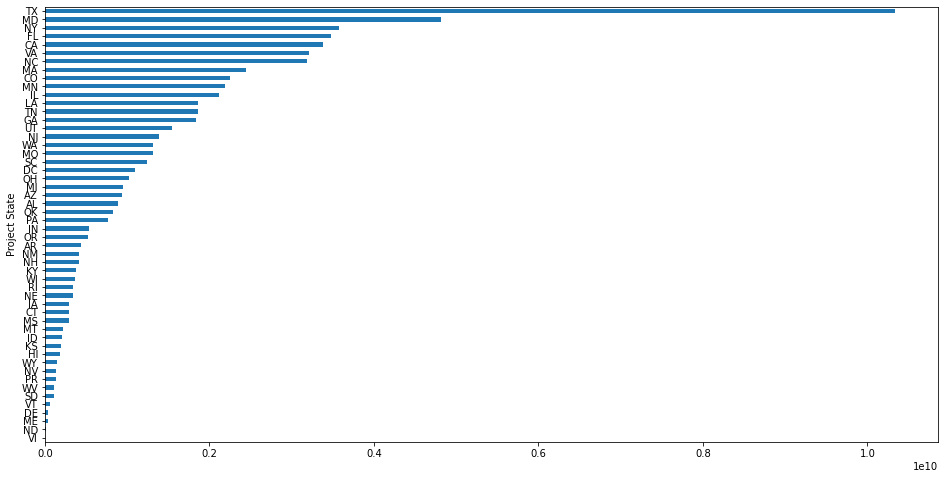

In [16]:
df.groupby(["Project State"]).final_mortgage.sum().sort_values().plot.barh()